#### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Reading the data file
TSV stands for Tab Separated Values and this report can be opened in Excel or similar program

In [4]:
df = pd.read_csv('spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
#Data Preprocessing

In [5]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [7]:
df['label'].value_counts()/ (len(df))

label
ham     0.865937
spam    0.134063
Name: count, dtype: float64

In [8]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [10]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [12]:
ham = ham.sample(spam.shape[0])

In [16]:
data = pd.concat([ham,spam],ignore_index=True)
data.shape

(1494, 4)

In [17]:
data['label'].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

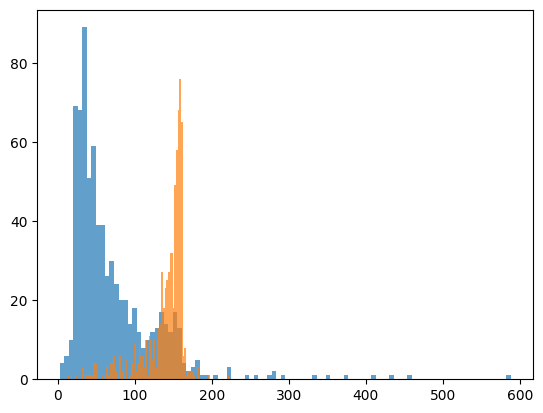

In [18]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

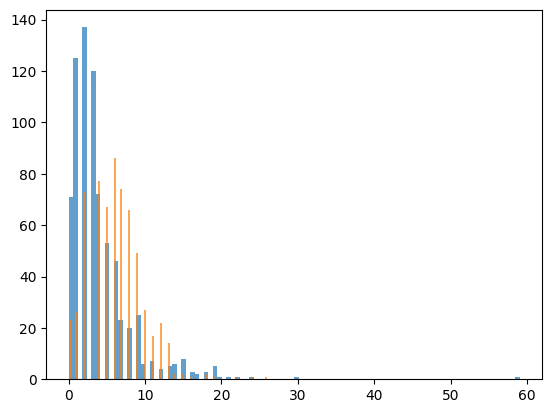

In [19]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test =  train_test_split(data['message'], data['label'], test_size = 0.3, random_state =0, shuffle = True)

#### Building the Model (Random Forest)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [23]:
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

In [24]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

### Predicting the results (Random Forest)

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
y_test, y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam'

In [28]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [29]:
accuracy_score(y_test, y_pred)

0.9532293986636972

In [30]:
confusion_matrix(y_test, y_pred)

array([[225,   2],
       [ 19, 203]], dtype=int64)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.99      0.96       227
        spam       0.99      0.91      0.95       222

    accuracy                           0.95       449
   macro avg       0.96      0.95      0.95       449
weighted avg       0.96      0.95      0.95       449



#### Building the Model (SVM)

In [32]:
from sklearn.svm import SVC

In [33]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100, gamma='auto'))])

In [34]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [35]:
y_pred = svm.predict(X_test)

In [36]:
accuracy_score(y_test, y_pred)

0.9420935412026726

In [37]:
confusion_matrix(y_test, y_pred)

array([[223,   4],
       [ 22, 200]], dtype=int64)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.98      0.94       227
        spam       0.98      0.90      0.94       222

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [39]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [40]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [41]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
